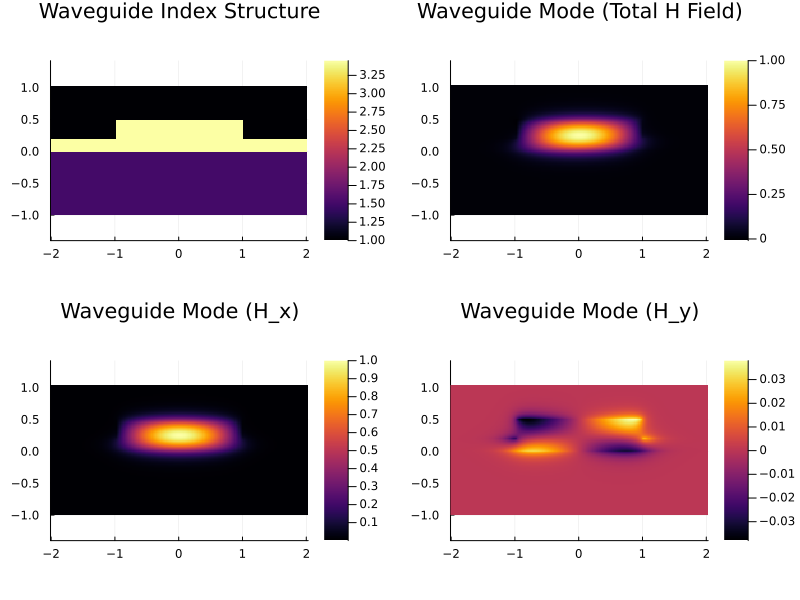

In [1]:
import WGMODES
import Plots

lambda = 1.55 # 波長は基本波とSH光の二倍の波長を指定する
dx = dy = 0.02
x = -2:dx:2
y = -1:dy:1
# これがmatlabならwaveguidemeshfullで導出できるらしい
index = [y < 0 ? 1.5 : (y < 0.2 || (y < 0.5 && abs(x) < 1) ? 3.45 : 1.0) for y = y, x = x]
epsilon = index .^ 2
guess = maximum(index)
nmodes = 1
boundary = "0000" # これは固定でいいらしい

hx, hy, neff = WGMODES.wgmodes(lambda, guess, nmodes, dx, dy, epsilon, boundary);

x = [x; x[end] + dx]
y = [y; y[end] + dy]

Plots.plot(
    Plots.heatmap(x, y, index,
        title="Waveguide Index Structure",
        aspectratio=1,
    ),
    Plots.heatmap(x, y, real.(hx[:, :, 1] .+ hy[:, :, 1]),
        title="Waveguide Mode (Total H Field)",
        aspectratio=1,
    ),
    Plots.heatmap(x, y, real.(hx[:, :, 1]),
        title="Waveguide Mode (H_x)",
        aspectratio=1,
    ),
    Plots.heatmap(x, y, real.(hy[:, :, 1]),
        title="Waveguide Mode (H_y)",
        aspectratio=1,
    ),
    size=(800, 600),
)


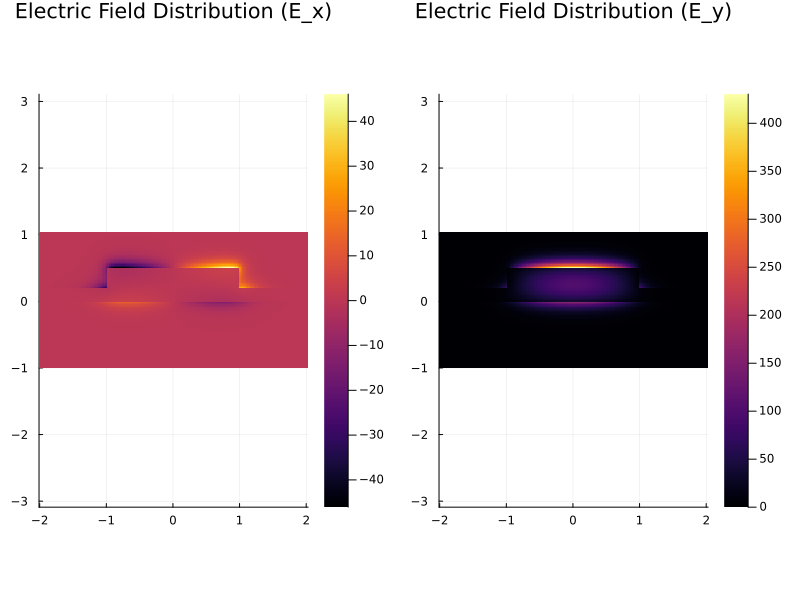

In [3]:
# Constants
c0 = 299792458            # Speed of light in vacuum (m/s)
mu0 = 4π * 1e-7           # Permeability of free space (H/m)
epsilon0 = 1 / (mu0 * c0^2)  # Permittivity of free space (F/m)
omega = 2π * c0 / lambda    # Angular frequency (rad/s)

# Effective propagation constant
k0 = 2π / lambda            # Free-space wave number
beta = neff[1] * k0         # Propagation constant for the first mode

# Compute electric field components
Ex = similar(hx[:, :, 1])
Ey = similar(hy[:, :, 1])

# Assuming H_z is negligible
epsilon_r = epsilon[:, :]   # Relative permittivity at each point

for i in 1:size(hx, 1)
    for j in 1:size(hx, 2)
        if i <= size(epsilon_r, 1) && j <= size(epsilon_r, 2)
            epsilon_point = epsilon_r[i, j] * epsilon0
            if i <= size(hy, 1) && j <= size(hy, 2)
                Ex[i, j] = (beta / (omega * epsilon_point)) * hy[i, j, 1]
            end
            if i <= size(hx, 1) && j <= size(hx, 2)
                Ey[i, j] = (beta / (omega * epsilon_point)) * hx[i, j, 1]
            end
        end
    end
end

# Plotting the electric field distributions
Plots.plot(
    Plots.heatmap(x, y, real.(Ex),
        title="Electric Field Distribution (E_x)",
        aspectratio=1,
    ),
    Plots.heatmap(x, y, real.(Ey),
        title="Electric Field Distribution (E_y)",
        aspectratio=1,
    ),
    size=(800, 600),
)